In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


In [3]:
df = pd.read_csv("spam.csv" , encoding=('ISO-8859-1'))

In [4]:
df.head()


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape



(5572, 5)

In [5]:
#data cleaning
#2.EDA
#3.text processing
#4.model building
#5.evalution
#6.improvement 
#7.website
#8.deploy


## 


data cleaning


In [5]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 column
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace= True)

In [6]:
df.sample(5)


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3351,ham,Call him and say you not coming today ok and t...,NaN,NaN,NaN
4817,ham,How's ur paper?,NaN,NaN,NaN
4461,ham,"Sorry I flaked last night, shit's seriously go...",NaN,NaN,NaN
818,ham,Then why you not responding,NaN,NaN,NaN
955,ham,Sorry i now then c ur msg... Yar lor so poor t...,NaN,NaN,NaN


In [9]:

#remaining cols
df.rename(columns={'v1' : 'target', 'v2' : 'textmode'},inplace=True)
df.sample(5)

,target,textmode
2014,ham,Ambrith..madurai..met u in arun dha marrge..re...
1465,spam,YOU 07801543489 are guaranteed the latests Nok...
2025,ham,"Yes obviously, but you are the eggs-pert and t..."
823,spam,25p 4 alfie Moon's Children in need song on ur...
3494,spam,Wan2 win a Meet+Greet with Westlife 4 U or a m...


In [10]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


In [11]:


df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,textmode
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# missing value
df.isnull().sum()

target      0
textmode    0
dtype: int64

In [14]:
# check for duplicate value
df.duplicated().sum()

np.int64(403)

In [15]:
#remove duplicate
df = df.drop_duplicates(keep='first')

In [16]:
df.duplicated().sum()

np.int64(0)

In [17]:
df.shape

(5169, 2)

##EDA


In [18]:
df.head()

,target,textmode
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

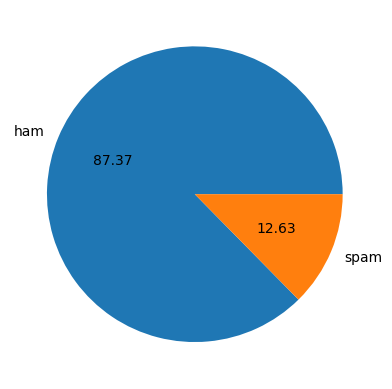

In [20]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'], autopct="%0.2f")
plt.show()

In [21]:
# data is imbalanced


In [22]:
import nltk

In [23]:
nltk.download('punkt') 


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [24]:
df['num_character'] = df['textmode'].apply(len)

In [25]:
df.head()

,target,textmode,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Error loading punkt_tab: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [27]:
df['num_word'] = df['textmode'].apply(lambda x:len(nltk.word_tokenize(x)))

In [28]:
df.head()

,target,textmode,num_character,num_word
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [29]:
df['num_sent'] = df['textmode'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [30]:
df.head()

,target,textmode,num_character,num_word,num_sent
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [31]:
df[['num_character','num_word','num_sent']].describe()

,num_character,num_word,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [32]:
##ham

df[df['target']==0][['num_character','num_word','num_sent']].describe()



,num_character,num_word,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [33]:
##spam
df[df['target']==1][['num_character','num_word','num_sent']].describe()

,num_character,num_word,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [34]:
import seaborn as sns

<Axes: xlabel='num_character', ylabel='Count'>

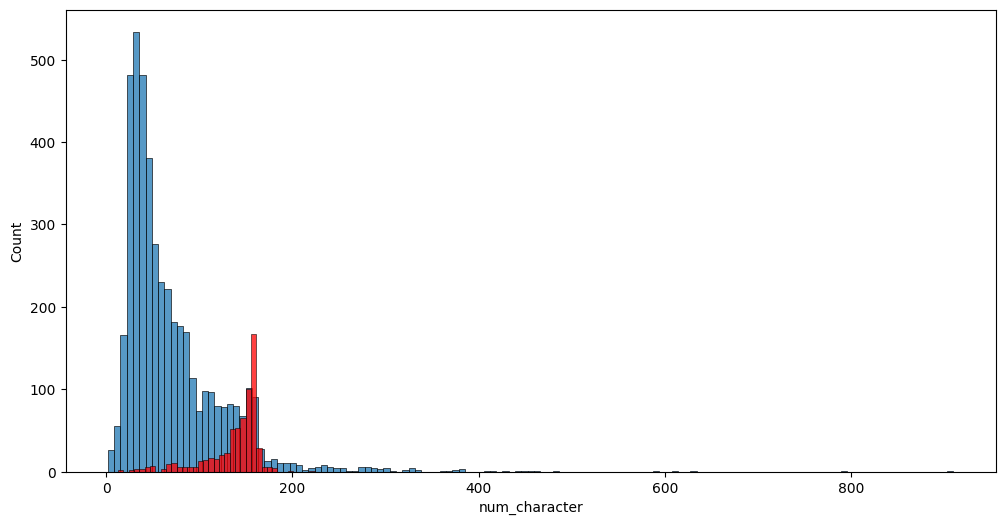

In [35]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0 ]['num_character'])
sns.histplot(df[df['target'] ==1 ]['num_character'],color='red')

<Axes: xlabel='num_word', ylabel='Count'>

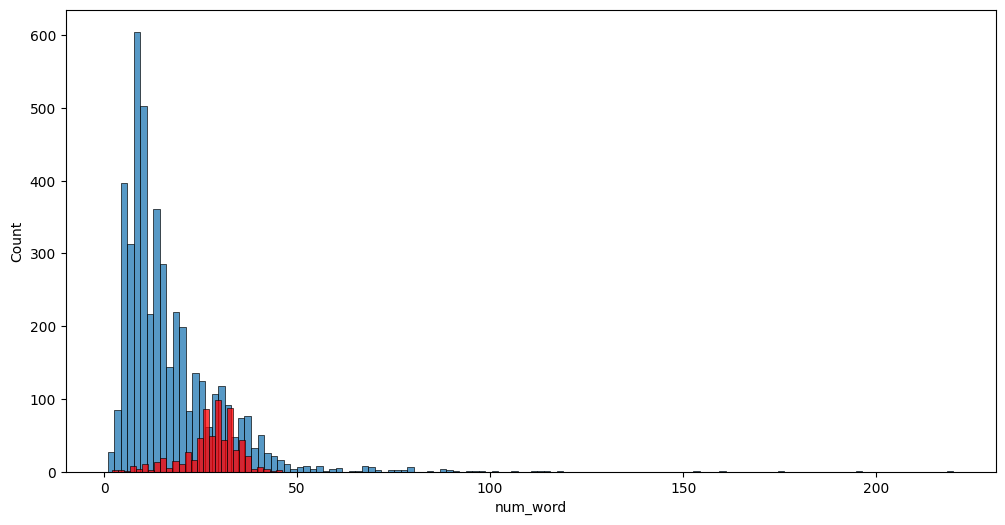

In [36]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] ==0 ]['num_word'])
sns.histplot(df[df['target'] ==1 ]['num_word'],color='red')

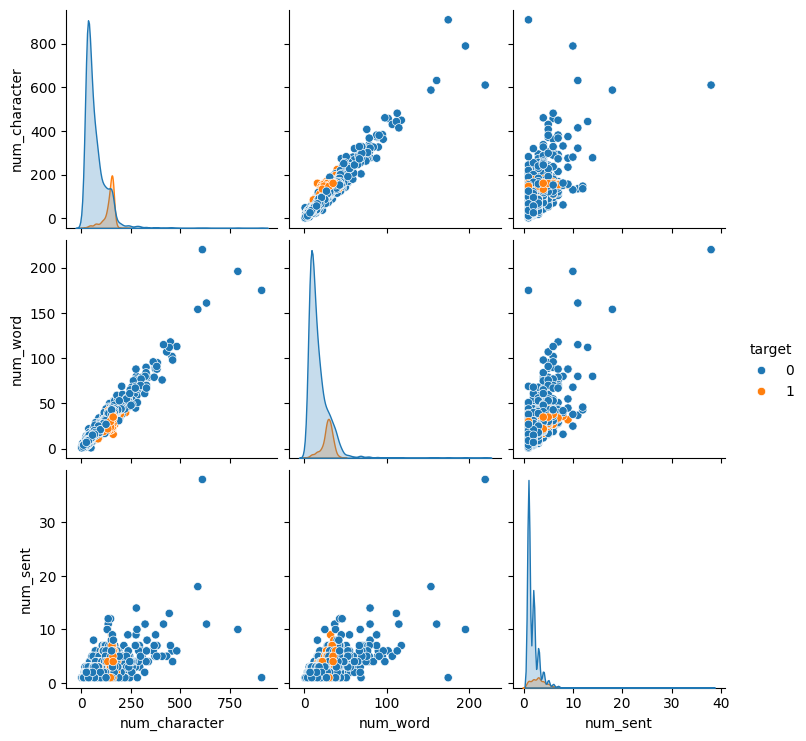

In [37]:
sns.pairplot(df,hue='target')

<Axes: >

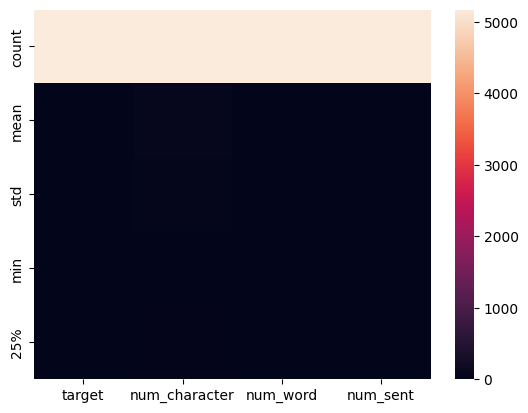

In [38]:
sns.heatmap(df.describe().head())

#### data processing


In [39]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [40]:
import string
string.punctuation


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('dancing')

'danc'

In [42]:
def transform_text(textmode):
  textmode = textmode.lower()
  textmode = nltk.word_tokenize(textmode)
  
     
  y=[]
  for i in textmode:
    if i.isalnum():
       y.append(i) 
  textmode = y[:]
  y.clear()
  for i in textmode:
    
    if i not in stopwords.words('english') and i not in string.punctuation:
        y.append(i)
  textmode = y[:]
  y.clear()
  for i in textmode:
       y.append(ps.stem(i))
  return " ".join(y)

In [43]:
transform_text('Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'
)


'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [44]:
df['textmode'][0]


'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'

In [45]:
df['transformed_text'] = df['textmode'].apply(transform_text)


In [46]:
df.head()

,target,textmode,num_character,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [47]:
from wordcloud import WordCloud
wc = WordCloud()



In [48]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


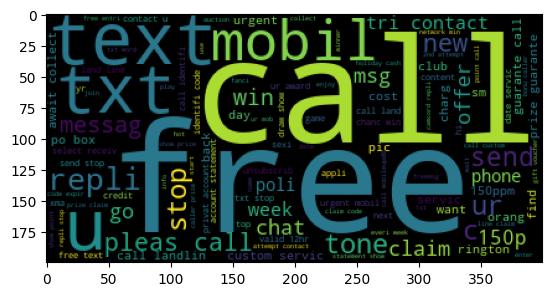

In [49]:
plt.imshow(spam_wc)

In [50]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))


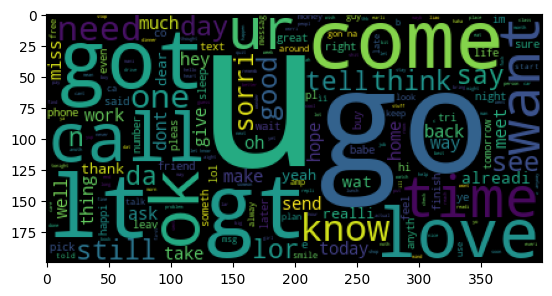

In [51]:
plt.imshow(ham_wc)

In [52]:
df.head()

,target,textmode,num_character,num_word,num_sent,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [53]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
 for words in msg.split():
    spam_corpus.append(words)

In [54]:

len(spam_corpus)

9939

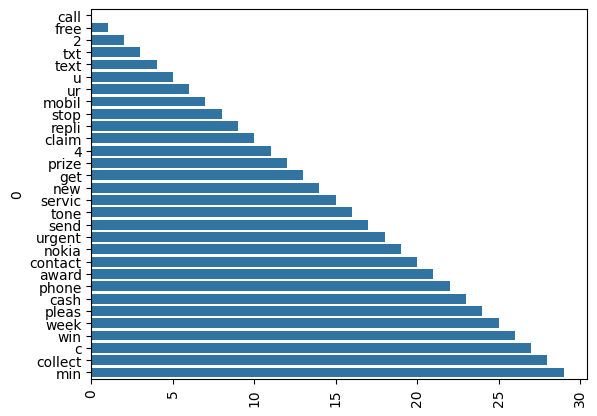

In [55]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

In [56]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
 for words in msg.split():
    ham_corpus.append(words)


In [57]:
len(ham_corpus)

35404

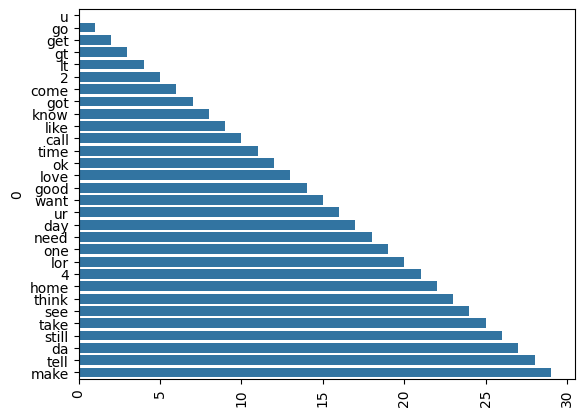

In [58]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0])
plt.xticks(rotation='vertical')
plt.show()

4.model building

In [59]:
cv = CountVectorizer()
tfid = TfidfVectorizer()
tfid = TfidfVectorizer(max_features=3000)

In [60]:
x = tfid.fit_transform(df['transformed_text']).toarray()


In [61]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#x = scaler.fit_transform(x)

In [62]:
#appending the num_character col to x 
#x = np.hstack((x,df['num_character'].values.reshape(-1,1)))

In [63]:
x.shape

(5169, 3000)

In [64]:

y = df['target'].values

In [65]:
y


array([0, 0, 1, ..., 0, 0, 0])

In [66]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [67]:
x_train.shape

(4135, 3000)

In [68]:
x_test.shape

(1034, 3000)

In [69]:
y_train.shape

(4135,)

In [70]:
y_test.shape

(1034,)

In [71]:
gnb = GaussianNB()
mng = MultinomialNB()
bnb = BernoulliNB()

In [72]:
gnb.fit(x_train,y_train)
y_pred1 = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))
      

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [73]:
mng.fit(x_train,y_train)
y_pred2 = mng.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))
      

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [74]:
bnb.fit(x_train,y_train)
y_pred3 = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))
      

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [75]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC

In [76]:
svc = SVC( kernel='sigmoid', gamma=1.0)
knc =  KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear')
rfc = RandomForestClassifier(n_estimators=50,random_state=2)
abc = AdaBoostClassifier(n_estimators=50,random_state=2)
bc = BaggingClassifier(n_estimators=50,random_state=2)
etc = ExtraTreesClassifier(n_estimators=50,random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)



In [77]:
clfs = {
          'SVC' : svc,
          'KN' : knc, 
          'NB' : mnb, 
          'DT' : dtc, 
          'LR' : lrc,  
          'RF' : rfc, 
          'AdaBOOST' :abc,
          'ETC'  :etc,
          'GBDT':gbdt
        
    
}


In [78]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
     clf.fit(x_train,y_train)
     y_pred = clf.predict(x_test)
     accuracy = accuracy_score(y_test,y_pred)
     precision = precision_score(y_test,y_pred)
   
     return accuracy,precision



In [79]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, np.float64(0.9747899159663865))

In [80]:

accuracy_scores = []
precision_scores = []
for name,clf in clfs.items():
    
     current_accuracy,current_precision = train_classifier(clf,x_train,y_train,x_test,y_test)

     print("for ",name)
     print("Accuracy =  ",current_accuracy)
     print("precision = ",current_precision)

     accuracy_scores.append(current_accuracy)
     precision_scores.append(current_precision)



for  SVC
Accuracy =   0.9758220502901354
precision =  0.9747899159663865
for  KN
Accuracy =   0.9052224371373307
precision =  1.0
for  NB
Accuracy =   0.9709864603481625
precision =  1.0
for  DT
Accuracy =   0.9274661508704062
precision =  0.8118811881188119
for  LR
Accuracy =   0.9564796905222437
precision =  0.979381443298969
for  RF
Accuracy =   0.9758220502901354
precision =  0.9829059829059829


c:\Users\hp\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


for  AdaBOOST
Accuracy =   0.960348162475822
precision =  0.9292035398230089
for  ETC
Accuracy =   0.9748549323017408
precision =  0.9745762711864406
for  GBDT
Accuracy =   0.9468085106382979
precision =  0.9191919191919192


In [81]:
df1 = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy' : accuracy_scores,'precision' : precision_scores})


In [82]:

df1

,Algorithm,Accuracy,precision
0,SVC,0.975822,0.974790
1,KN,0.905222,1.000000
2,NB,0.970986,1.000000
3,DT,0.927466,0.811881
4,LR,0.956480,0.979381
5,RF,0.975822,0.982906
6,AdaBOOST,0.960348,0.929204
7,ETC,0.974855,0.974576
8,GBDT,0.946809,0.919192


In [83]:
performance_df1 = pd.melt(df1, id_vars='Algorithm')

##model improve


In [84]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.975822
1,KN,Accuracy,0.905222
2,NB,Accuracy,0.970986
3,DT,Accuracy,0.927466
4,LR,Accuracy,0.956480
5,RF,Accuracy,0.975822
6,AdaBOOST,Accuracy,0.960348
7,ETC,Accuracy,0.974855
8,GBDT,Accuracy,0.946809
9,SVC,precision,0.974790


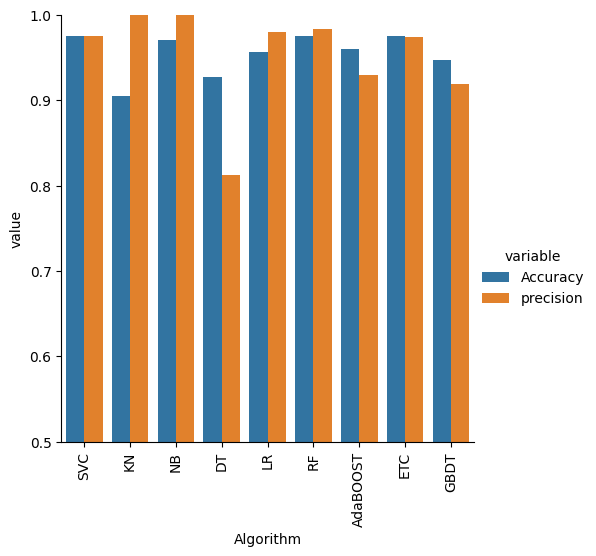

In [85]:
sns.catplot(x = 'Algorithm', y='value',
            hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()


In [86]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores})

In [87]:
performance_df1.merge(temp_df,on='Algorithm')

,Algorithm,variable,value,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,Accuracy,0.975822,0.975822,0.974790
1,KN,Accuracy,0.905222,0.905222,1.000000
2,NB,Accuracy,0.970986,0.970986,1.000000
3,DT,Accuracy,0.927466,0.927466,0.811881
4,LR,Accuracy,0.956480,0.956480,0.979381
5,RF,Accuracy,0.975822,0.975822,0.982906
6,AdaBOOST,Accuracy,0.960348,0.960348,0.929204
7,ETC,Accuracy,0.974855,0.974855,0.974576
8,GBDT,Accuracy,0.946809,0.946809,0.919192
9,SVC,precision,0.974790,0.975822,0.974790


In [88]:
new_df = performance_df1.merge(temp_df,on='Algorithm')

In [89]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores})

In [90]:
new_df

,Algorithm,variable,value,Accuracy_max_ft_3000,Precision_max_ft_3000
0,SVC,Accuracy,0.975822,0.975822,0.974790
1,KN,Accuracy,0.905222,0.905222,1.000000
2,NB,Accuracy,0.970986,0.970986,1.000000
3,DT,Accuracy,0.927466,0.927466,0.811881
4,LR,Accuracy,0.956480,0.956480,0.979381
5,RF,Accuracy,0.975822,0.975822,0.982906
6,AdaBOOST,Accuracy,0.960348,0.960348,0.929204
7,ETC,Accuracy,0.974855,0.974855,0.974576
8,GBDT,Accuracy,0.946809,0.946809,0.919192
9,SVC,precision,0.974790,0.975822,0.974790


In [91]:
new_df_scaled =new_df.merge(temp_df,on='Algorithm')

In [92]:
new_df_scaled

,Algorithm,variable,value,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_scaling,Precision_scaling
0,SVC,Accuracy,0.975822,0.975822,0.974790,0.975822,0.974790
1,KN,Accuracy,0.905222,0.905222,1.000000,0.905222,1.000000
2,NB,Accuracy,0.970986,0.970986,1.000000,0.970986,1.000000
3,DT,Accuracy,0.927466,0.927466,0.811881,0.927466,0.811881
4,LR,Accuracy,0.956480,0.956480,0.979381,0.956480,0.979381
5,RF,Accuracy,0.975822,0.975822,0.982906,0.975822,0.982906
6,AdaBOOST,Accuracy,0.960348,0.960348,0.929204,0.960348,0.929204
7,ETC,Accuracy,0.974855,0.974855,0.974576,0.974855,0.974576
8,GBDT,Accuracy,0.946809,0.946809,0.919192,0.946809,0.919192
9,SVC,precision,0.974790,0.975822,0.974790,0.975822,0.974790


In [93]:
#apply stacking
estimators = [('SVM',svc),('nb',mnb),('et',etc)]
final_estimator = RandomForestClassifier()

In [94]:
from sklearn.ensemble import StackingClassifier


In [95]:
clf = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [96]:
clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9806576402321083
Precision 0.9538461538461539


In [97]:
#cv = CountVectorizer()
##x = cv.fit_transform(df['textmode'])

In [98]:
#x_train,x_test,y_train,y_test = train_test_split(x ,df['target'],test_size=0.2)

In [99]:
#clf.fit(x_train,y_train)
#y_pred = clf.predict(x_test)

In [100]:
#accuracy = accuracy_score(y_test,y_pred)
#print(accuracy)

In [101]:
#def predictmessage(message):
    #messagevector = cv.transform([message])
    #prediction = clf.predict(messagevector)
    #return 'spam' if prediction[0] ==1 else 'ham'
 

##usermessage = input('enter message to predict: ')
#prediction = predictmessage(usermessage)
#print(f'the message is: {prediction}')#



In [102]:
import pickle
pickle.dump(tfid,open('Vectorizer_vct.pkl','wb'))
pickle.dump(mnb,open('model_vct.pkl','wb'))